# Basic Python Practices

#### Exercise 00. Variable Declaration

Define the following variables with values of your choice:

- A variable that stores your name (text).
- A variable that stores your age (integer).
- A variable that indicates if you like programming (true or false).
- A variable that stores your average grade (decimal number).

In [74]:
# Declare your variables here.

#greeting = "Hello world"
STUDENT_NAME = "N. Winocur"
student_age_fictional = 700
LIKES_PROGRAMMING = True
your_average_grade = 9000.1

- Create a list with your five favorite numbers and print it.

In [75]:
# Favorite numbers list
import math
favored_numbers_list = [0,1,math.pi,69,1337]
print(favored_numbers_list)

[0, 1, 3.141592653589793, 69, 1337]


- Create a dictionary that stores a student's information and print it:

        - Name
        - Age
        - Final grade

In [76]:
student_information = {"Name":STUDENT_NAME, "Age":student_age_fictional, "Final grade":your_average_grade}
print(student_information)

{'Name': 'N. Winocur', 'Age': 700, 'Final grade': 9000.1}


#### Exercise 01. Basic data analysis with native Python structures.  
Create a list with the grades of 5 students: [8.5, 9.2, 7.8, 8.9, 10].

- Calculate the average of the grades.

In [77]:
import numpy as np
student_grades = [8.5, 9.2, 7.8, 8.9, 10]
their_average = np.mean(student_grades)
print(their_average)

8.879999999999999


- Find the highest and lowest grade.

In [78]:
highest_grade = np.max(student_grades)
lowest_grade = np.min(student_grades)
print(highest_grade)
print(lowest_grade)

10.0
7.8


# Real estate data cleaning with Pandas for efficient analysis

This is a real dataset that was downloaded using web scraping techniques. The data contains records from **Fotocasa**, one of the most popular real estate websites in Spain. Please do not perform web scraping unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and no economic benefit was obtained from it.

It contains thousands of real house listings published on the website www.fotocasa.com. Your goal is to extract as much information as possible with the data science knowledge you have acquired so far.

Let's get started!

- First, let's read and explore the dataset.

In [79]:
import pandas as pd

# Leer el archivo CSV
ds = pd.read_csv('assets/real_estate.csv', sep=';') # Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds # mostramos todo

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


- Display the first rows of the CSV file.

In [80]:
print(ds.head(10)) #default shows first five rows; showing ten confirms we have at least one NaN value

   Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0           1       153771986  False            ferrari 57 inmobiliaria   
1           2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2           3       153430440  False                 look find boadilla   
3           4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4           5       153180188  False            ferrari 57 inmobiliaria   
5           6       153934794  False                            expimad   
6           7       153848236  False                            expimad   
7           8       153482331  False                            expimad   
8           9       153885351  False                            expimad   
9          10       153215459  False                            modesta   

   phone_realEstate                                       url_inmueble  rooms  \
0       912177526.0  https://www.fotocasa.es/es/comprar/vivienda/ma...    3.0   
1       9163

Perfect, this was a small practice. Now let's begin with the real exercises!

#### Exercise 01. What is the most expensive house in the entire dataset? (★☆☆)

Print the address and price of the selected house. For example:

`The house located at Calle del Prado, Nº20 is the most expensive, and its price is 5000000 USD.`

In [81]:
#print(ds.columns)
expensive_house_price = ds.price.max()
expensive_house_id = ds.price.idxmax()
expensive_house_address = ds.address[expensive_house_id]

print(f"The house located at {expensive_house_address} is the most expensive, and its price is {expensive_house_price} USD.")

The house located at El Escorial is the most expensive, and its price is 8500000 USD.


#### Exercise 02. What is the cheapest house in the dataset? (★☆☆)

This exercise is similar to the previous one, except now we are looking for the house with the lowest price. Remember to print the address and price of the selected house. For example:

`The house located at Calle Alcalá, Nº58 is the cheapest, and its price is 12000 USD.`


In [82]:
inexpensive_house_price = ds.price[ds.price>0].min()
inexpensive_house_id = ds.price[ds.price>0].idxmin()
inexpensive_house_address = ds.address[inexpensive_house_id]

print(f"The house located at {inexpensive_house_address} is the cheapest, and its price is {inexpensive_house_price} USD.")

The house located at Berlin, Coslada is the cheapest, and its price is 600 USD.


#### Exercise 03. What is the largest and smallest house in the dataset? (★☆☆)

Print the address and area of the selected houses. For example:

`The largest house is located at Calle Gran Vía, Nº38, and its area is 5000 square meters.`

`The smallest house is located at Calle Mayor, Nº12, and its area is 200 square meters.`

This exercise is similar to the previous one, but we are looking for the largest and smallest houses based on their area.

In [83]:
largest_house_area = ds.surface.max()
largest_house_id = ds.surface.idxmax()
largest_house_address = ds.address[largest_house_id]

print(f"The largest house is located at {largest_house_address}, and its area is {largest_house_area} square meters.")


smallest_house_area = ds.surface[ds.surface>0].min()
smallest_house_id = ds.surface[ds.surface>0].idxmin()
smallest_house_address = ds.address[smallest_house_id]

print(f"The smallest house is located at {smallest_house_address}, and its area is {smallest_house_area} square meters.")

The largest house is located at Sevilla la Nueva, and its area is 249000.0 square meters.
The smallest house is located at Calle Amparo,  Madrid Capital, and its area is 15.0 square meters.


#### Exercise 04. How many unique populations are in the dataset? (★☆☆)

Count the number of unique populations in the 'level5' column and print the names of the populations separated by commas. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [84]:
populations = ds.groupby("level5")
print(f"There are {populations.ngroups} unique populations in the dataset")

for pop in populations:
    print(f"{pop[0]}", end=", ")

There are 168 unique populations in the dataset
 Madrid Capital, Ajalvir, Alcalá de Henares, Alcobendas, Alcorcón, Aldea del Fresno, Algete, Alpedrete, Ambite, Anchuelo, Aranjuez, Arganda del Rey, Arroyomolinos (Madrid), Batres, Becerril de la Sierra, Belmonte de Tajo, Boadilla del Monte, Braojos, Brea de Tajo, Brunete, Buitrago del Lozoya, Bustarviejo, Cabanillas de la Sierra, Cadalso de los Vidrios, Camarma de Esteruelas, Campo Real, Canencia, Carabaña, Casarrubuelos, Cenicientos, Cercedilla, Chapinería, Chinchón, Ciempozuelos, Cobeña, Collado Mediano, Collado Villalba, Colmenar Viejo, Colmenar de Oreja, Colmenar del Arroyo, Colmenarejo, Corpa, Coslada, Cubas de la Sagra, Daganzo de Arriba, El Atazar, El Berrueco, El Boalo - Cerceda – Mataelpino, El Escorial, El Molar (Madrid), El Vellón, El Álamo, Estremera, Fresnedillas de la Oliva, Fresno de Torote, Fresno de Torote - Serracines, Fuenlabrada, Fuente El Saz de Jarama, Fuentidueña de Tajo, Galapagar, Garganta de los Montes, Garganti

#### Exercise 05. Does the dataset contain null values (NAs)? (★☆☆)

Print a boolean (`True` or `False`) to check if there are null values, followed by the columns that contain NAs.

In [85]:
columns_containing_na = []
is_na_found = False
for column_name, series in ds.items():
    # The "level#" columns look useful but columns like "level#Id" contain nothing but zeroes.  So just like the NaNs I see no reason to keep them.
    if series.isna().all() or (series ==0).all(): 
        is_na_found = True
        columns_containing_na.append(column_name)

print(f"NAs found? {is_na_found}")
print(columns_containing_na)


NAs found? True
['countryId', 'level1Id', 'level2Id', 'level3Id', 'level4Id', 'level5Id', 'level6Id', 'level7Id', 'level8Id', 'zipCode', 'customZone']


#### Exercise 06. Remove the null values (NAs) from the dataset, if applicable (★★☆)

After removing the null values, compare the size of the DataFrame before and after the removal.

In [86]:
size_before_removing_nulls = ds.size
print(f"Size before removing nulls was\t{size_before_removing_nulls}")
ds_without_nas = ds.dropna(axis=1, how="all")
print(f"Size after removing nulls is\t{ds_without_nas.size}")

#next will clear useless only-zeroes columns by replacing those values with NAs and then dropping the same way
ds_cleaned_up = ds.replace(0, np.nan).dropna(axis=1, how="all")
print(f"Size after removing both nulls and columns containing exclusively zeroes is\t{ds_cleaned_up.size}")

Size before removing nulls was	567395
Size after removing nulls is	536725
Size after removing both nulls and columns containing exclusively zeroes is	398710


#### Exercise 07. What is the average price in the population of "Arroyomolinos (Madrid)"? (★★☆)

Print the value obtained from the 'level5' column.

In [87]:
level_five_location = "Arroyomolinos (Madrid)"
real_estate_there = ds_cleaned_up[ds_cleaned_up['level5'] == level_five_location]

print(f"Average price in {level_five_location} is\t{real_estate_there.price.mean()}")
print(f"Ignoring prices listed as zero (just in case), that average would be\t{real_estate_there[real_estate_there['price'] > 0].price.mean()}")


Average price in Arroyomolinos (Madrid) is	298905.1777777778
Ignoring prices listed as zero (just in case), that average would be	298905.1777777778


#### Exercise 08. Plot the histogram of prices for the population of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write a brief analysis of the plot in the Markdown cell.

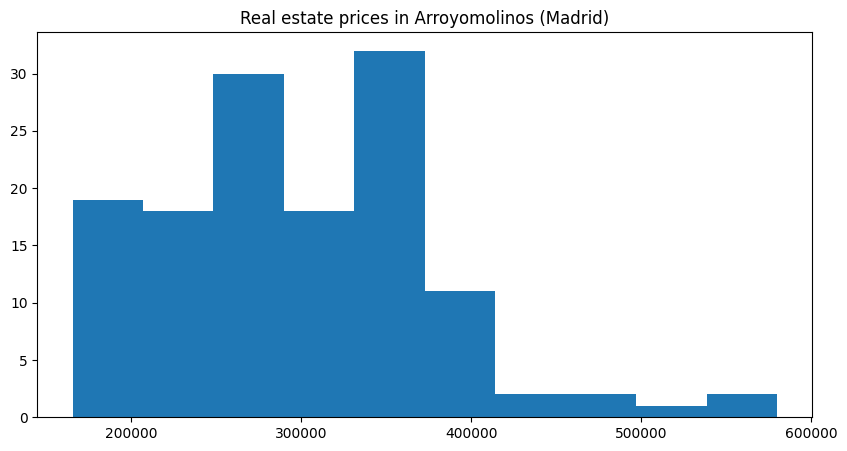

In [88]:
import matplotlib.pyplot as plt

# Plot the histogram of prices
plt.figure(figsize = (10, 5))
plt.hist(real_estate_there["price"], bins="auto")
plt.title(f"Real estate prices in {level_five_location}")
plt.show()

##### Analysis of this plot:
- Majority of home sales were in the $250k to $375k range
- More-affordable homes were still reasonably common; there were about as many homes costing between $150k-$200k as there were between $200k-$250k
- There were a little more than half as many sales between $375k to $425k as there were under $200k
- Homes costing over $425k were much less common, perhaps even fewer closings in total than the ones selling between $375k to $425k